In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind')
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
df = pd.read_csv("binary_adult_results.csv")
df['target'].value_counts()

income-per-year    80
Name: target, dtype: int64

In [3]:
df1 = pd.read_csv("no_fs_binary_adult_results.csv")
df1['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [16]:
df1['target'].value_counts()

income-per-year    16
Name: target, dtype: int64

In [4]:
df2 = pd.read_csv("new_fsfs_binary_adult.csv")
df2['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [5]:
frames = [df, df1, df2]

data = pd.concat(frames)
data['model_type'].unique()

array(['base_model', 'fair_model'], dtype=object)

In [6]:
data['fs'] = data['technique'].str.split(' ').apply(pd.Series)[1]

In [7]:
data = data.replace(['maximally_predictive_minimally_demographic','sequential_feature_selection_backward',
    'sequential_feature_selection_forward', 'xy_greater_xa','no_fselection','sequential_fs'], 
                  ['MPMD','bsfs','fsfs','xy>xa','no_fs','lr_fsfs'])


In [8]:
data['fs'].unique()

array(['MPMD', 'bsfs', 'fsfs', 'xy>xa', 'no_fs', 'lr_fsfs'], dtype=object)

In [9]:
data['model_type'].unique()


array(['base_model', 'fair_model'], dtype=object)

In [10]:
df = data.copy()

df = df[df.eta != 30]
df = df[df.eta != 1]
df = df[df.eta != 10]

In [11]:
df['eta'].unique()

array([nan, 20.])

In [12]:
df.columns

Index(['Unnamed: 0', 'data', 'features_cat', 'features_num',
       'protected_attributes', 'p_att_description', 'target', 'etas',
       'feat_dictionary', 'technique', 'model', 'dir_name', 'model_type',
       'disparate_impact', 'statistical_parity_difference',
       'equal_opportunity_difference', 'accuracy', 'eta', 'fs'],
      dtype='object')

In [15]:
df['target'].value_counts()

income-per-year    48
Name: target, dtype: int64

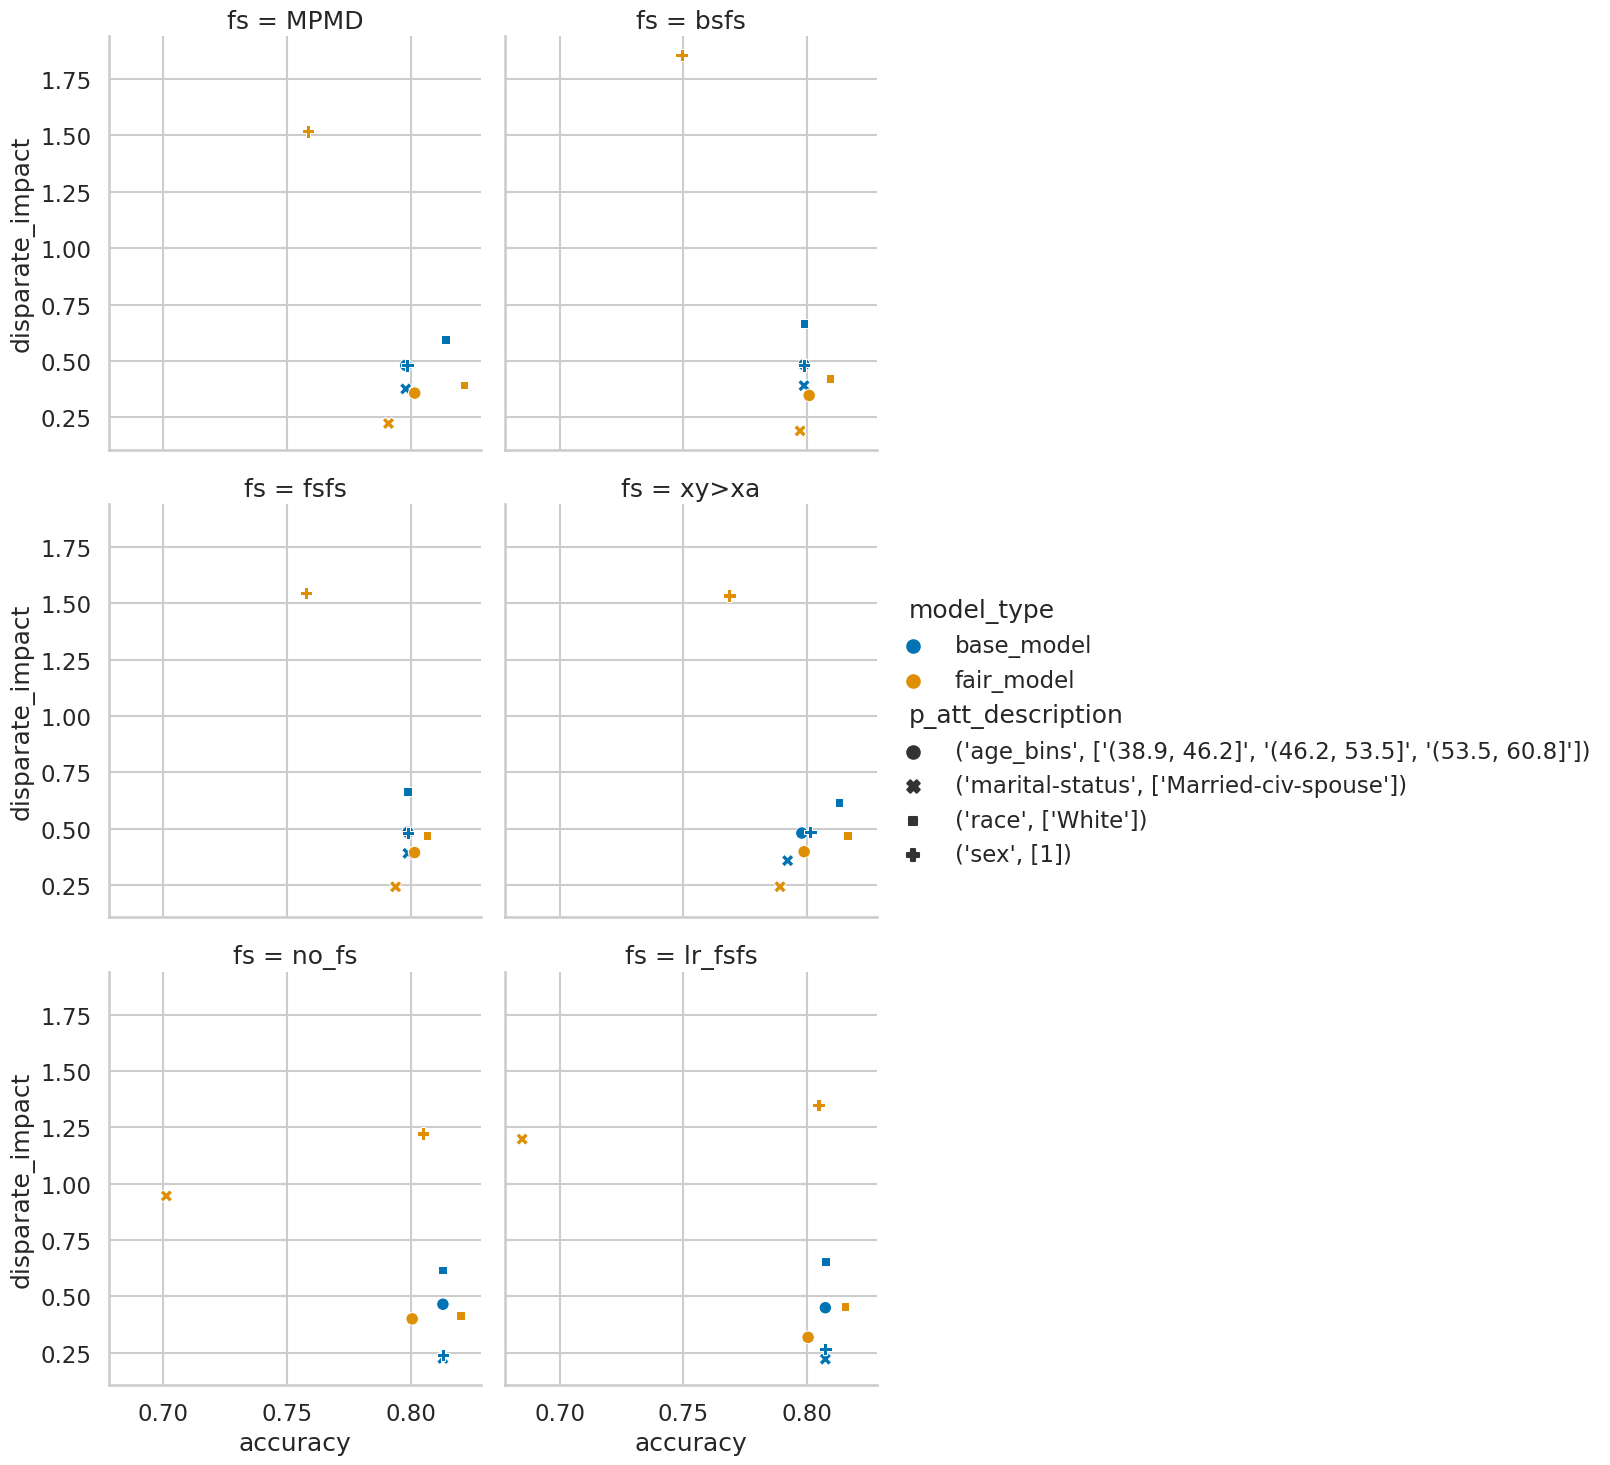

In [19]:
import matplotlib.pyplot as plt
di_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='disparate_impact', hue='model_type', col = 'fs', 
            style = 'p_att_description', col_wrap = 2)
plt.savefig('di_adult_eta_20plot.png')


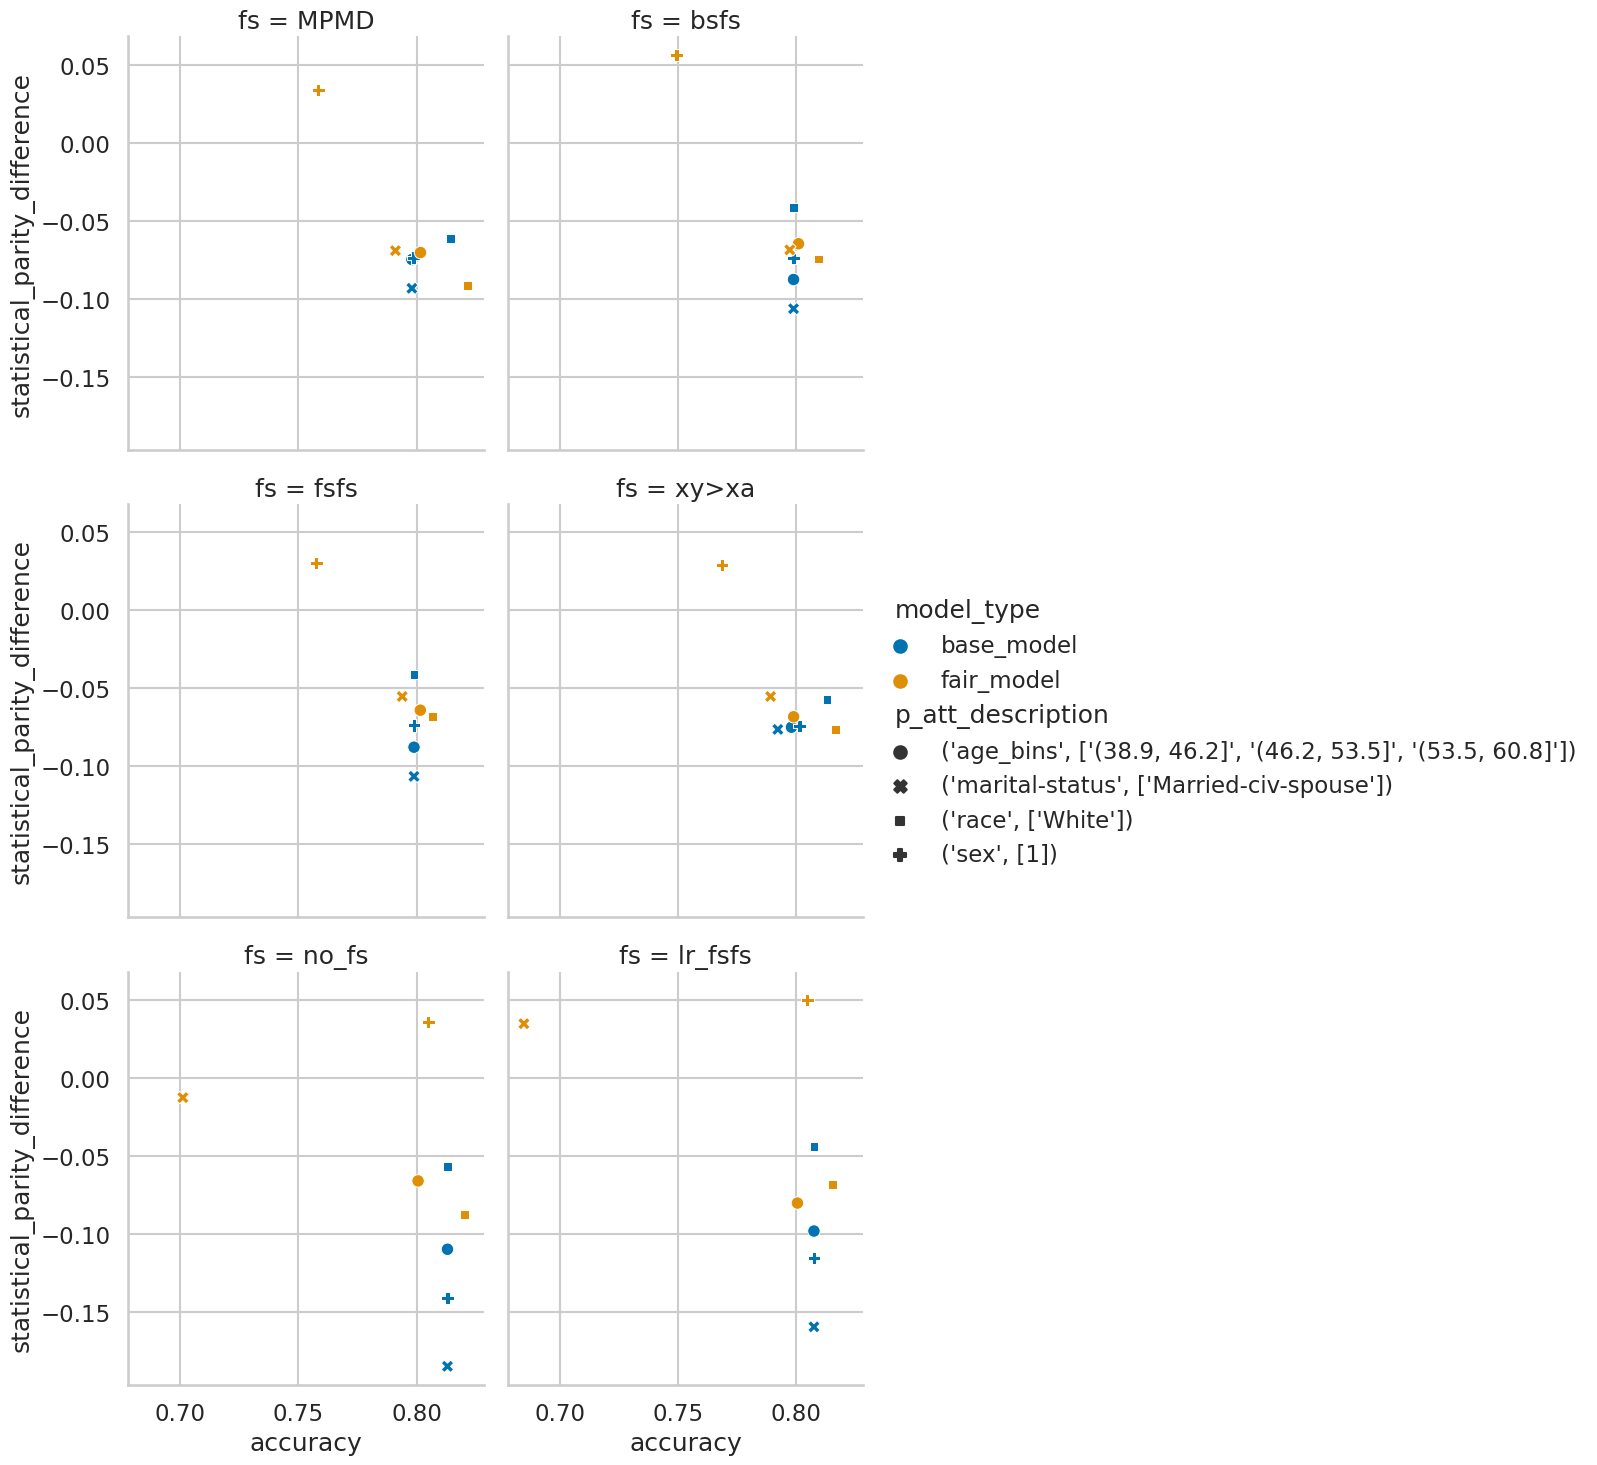

In [20]:
sp_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='statistical_parity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('sp_adult_eta_20plot.png')

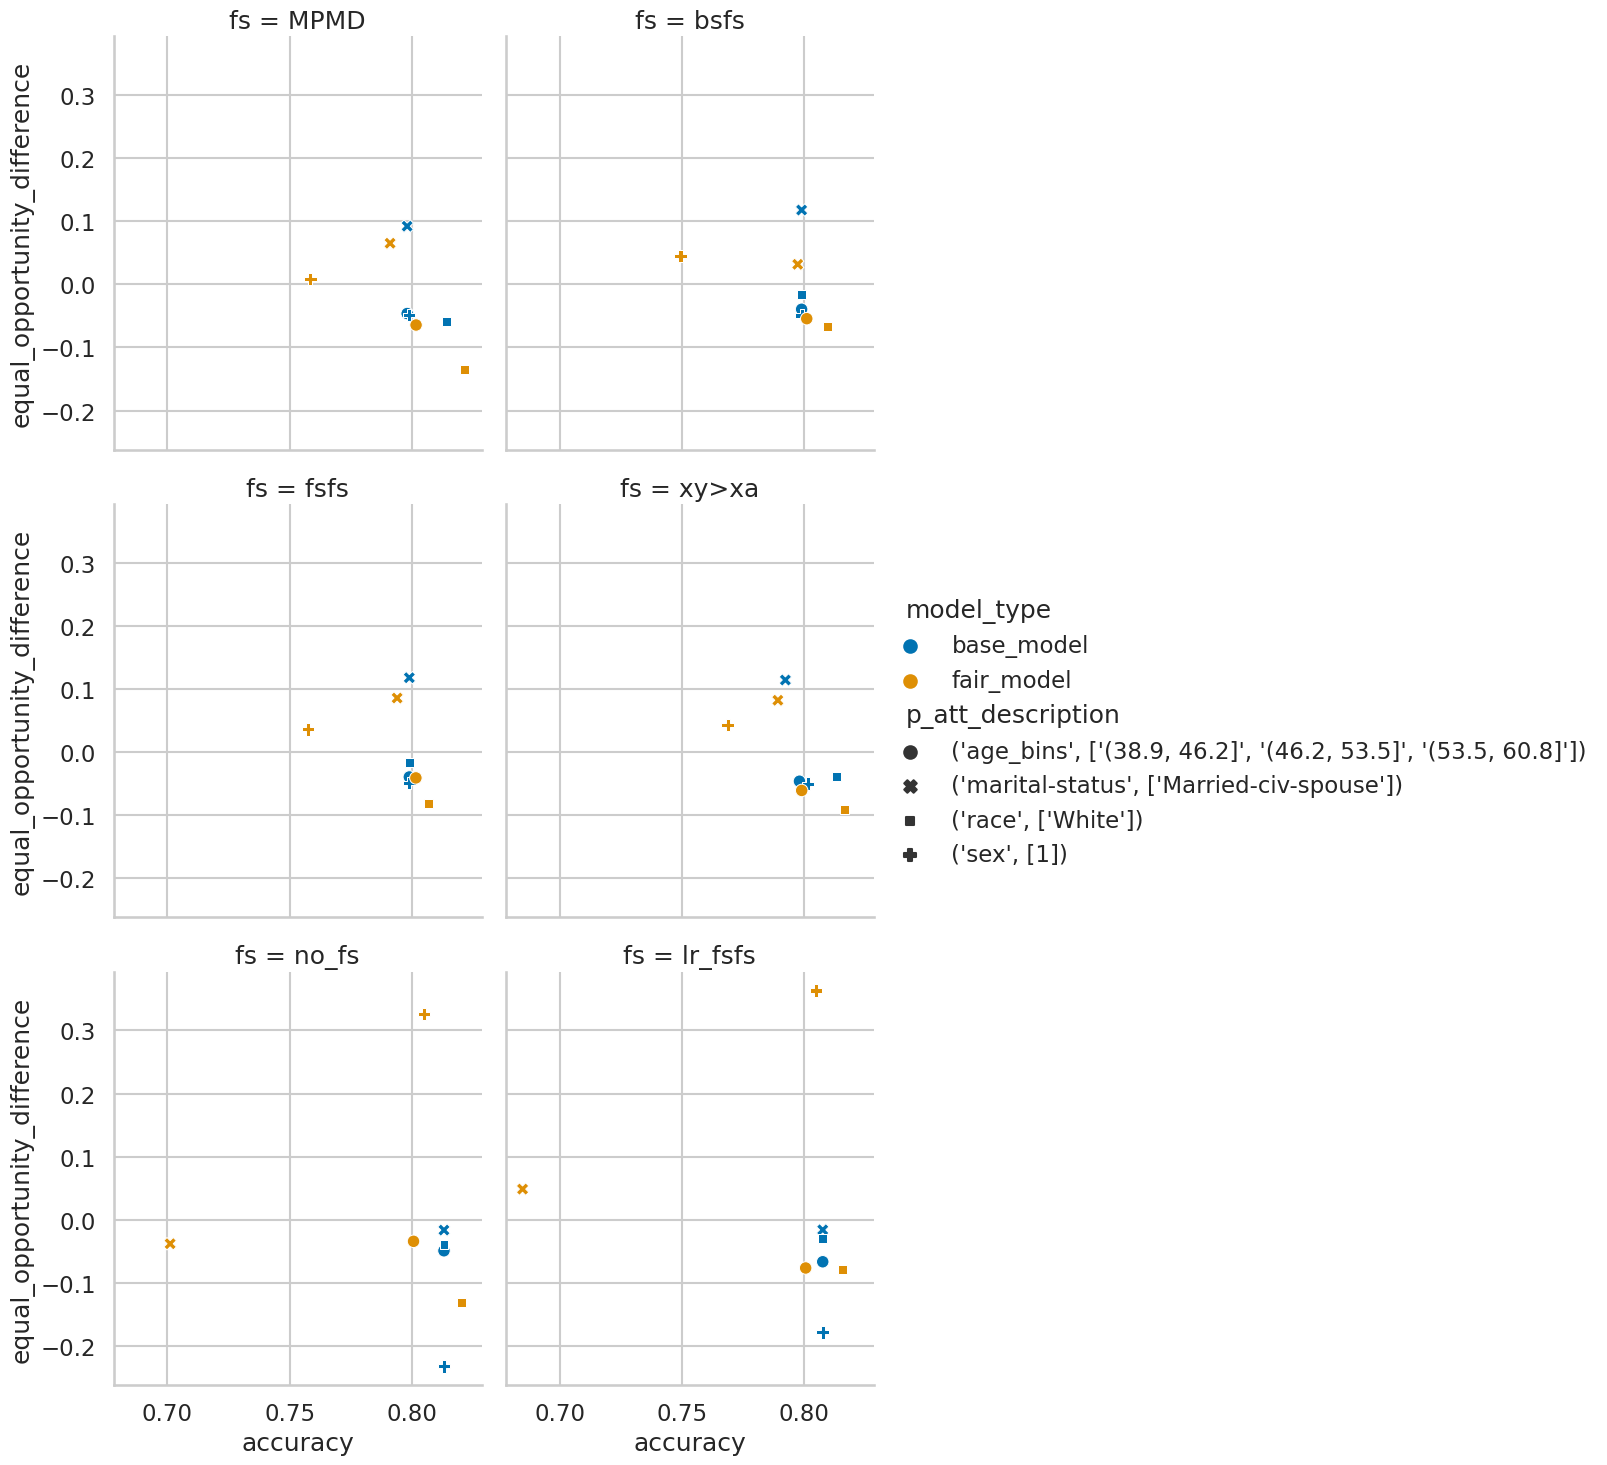

In [21]:
eo_adult_eta_20plot = sns.relplot(data = df, x = 'accuracy', y ='equal_opportunity_difference', hue='model_type', 
            col = 'fs',style = 'p_att_description', col_wrap = 2)
plt.savefig('eo_adult_eta_20plot.png')